##  Εισαγωγή

Η παρούσα εργασία έχει ως στόχο την κατασκευή και αξιολόγηση μοντέλων πρόβλεψης τιμής κατοικιών, με τη χρήση τεχνικών εποπτευόμενης μάθησης (supervised learning). Το dataset περιλαμβάνει 774 εγγραφές πωλήσεων κατοικιών, και ζητείται η δημιουργία τόσο απλών όσο και πιο σύνθετων γραμμικών μοντέλων παλινδρόμησης. Βασική επιδίωξη είναι η εκτίμηση της τιμής ενός ακινήτου βάσει χαρακτηριστικών όπως η επιφάνεια, ο αριθμός υπνοδωματίων, ο τύπος ακινήτου και η γεωγραφική περιοχή (ZIP code).

Η δομή της εργασίας ακολουθεί μια καθαρά οργανωμένη ροή. Στην αρχή εισάγονται όλες οι απαραίτητες βιβλιοθήκες που χρησιμοποιούνται σε μαθήματα supervised και unsupervised learning, ώστε να διατηρείται συνέπεια και επαναχρησιμοποίηση του κώδικα. Στη συνέχεια, παρουσιάζονται οι βασικές βοηθητικές συναρτήσεις που έχουν αναπτυχθεί στο πλαίσιο προηγούμενων μαθημάτων (όπως η εισαγωγή στην Python και η μη επιβλεπόμενη μάθηση). Οι συναρτήσεις αυτές εξελίσσονται σταδιακά, ενσωματώνοντας νέα χαρακτηριστικά ώστε να είναι ευέλικτες και επαναχρησιμοποιήσιμες σε διάφορα datasets και μεθοδολογίες.

Η ανάλυση εκτελείται **βήμα-βήμα**, ακολουθώντας τη ροή των ζητούμενων από την εκφώνηση, με ιδιαίτερη προσοχή στην ερμηνεία των αποτελεσμάτων και στην αιτιολόγηση των επιλογών. 

###  Χειρισμός των ακραίων τιμών (Outliers)

Επέλεξα **να μην αφαιρέσω outliers**, καθώς τα δεδομένα αφορούν τον κλάδο του real estate, όπου οι ακραίες τιμές μπορεί να είναι απολύτως υπαρκτές και σημαντικές για την εκπαίδευση ενός μοντέλου. Σπίτια πολύ μεγάλης ή πολύ μικρής αξίας δεν θεωρούνται σφάλματα, αλλά πραγματικές περιπτώσεις που το μοντέλο οφείλει να λαμβάνει υπόψη.

###  Κανονικοποίηση (Normalization)

Αρχικά εφαρμόστηκε η κανονικοποίηση των χαρακτηριστικών με χρήση **RobustScaler**, με στόχο τον περιορισμό της επίδρασης των outliers. Ωστόσο, αυτή η επιλογή αποδείχθηκε **αντίθετη προς τη βασική στρατηγική της εργασίας**, δηλαδή τη διατήρηση των outliers ως **πραγματικές και κρίσιμες** παρατηρήσεις στον τομέα του real estate. Συνεπώς, ο αποκλεισμός τους από την κανονικοποίηση δεν ευθυγραμμίζεται με την πρόθεση να ληφθούν σοβαρά υπόψη στη μάθηση του μοντέλου.

Στη συνέχεια, δοκιμάστηκε ο **MinMaxScaler**, επειδή οι περισσότερες μεταβλητές δεν εμφάνιζαν κανονική κατανομή. Η προσέγγιση αυτή είχε στόχο την ομοιόμορφη κλιμάκωση όλων των χαρακτηριστικών μεταξύ [0, 1], χωρίς αλλοίωση της μορφής των κατανομών.

Παρότι η κανονικοποίηση με MinMaxScaler βελτίωσε ελαφρώς τις προβλέψεις για τις **μη ακραίες παρατηρήσεις**, επιδείνωσε σημαντικά τα αποτελέσματα για τις **ακραίες τιμές**, όπως φάνηκε από την ειδική δοκιμή σε 5 κατοικίες. Το σφάλμα για τα outliers ήταν σημαντικά μεγαλύτερο με scaling, ενώ το μοντέλο χωρίς κανονικοποίηση απέδωσε πιο ρεαλιστικές προβλέψεις στις ίδιες περιπτώσεις.

Αξιοσημείωτο είναι ότι το **RMSE και το MAE στο training και test set** παρέμειναν **πανομοιότυπα** με και χωρίς scaling. Αυτό οφείλεται -υποθέτω- στο ότι **η κανονικοποίηση επηρεάζει τους αριθμητικούς συντελεστές του μοντέλου**, αλλά όχι τις ίδιες τις προβλέψεις, αφού η μετατροπή των χαρακτηριστικών συνοδεύεται από αντίστοιχη προσαρμογή των βαρών κατά την εκπαίδευση.

Για τους λόγους αυτούς, επιλέχθηκε **να μην εφαρμοστεί scaling στην τελική εκδοχή του μοντέλου**. Τα αποτελέσματα με χρήση MinMaxScaler καταγράφονται στο τέλος της εργασίας για λόγους πληρότητας και σύγκρισης.


In [1]:
# ===========================
#  Φόρτωση απαραίτητων βιβλιοθηκών
# ===========================

# --- Βασικές βιβλιοθήκες ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# --- Ρυθμίσεις εμφάνισης pandas ---
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

# ===========================
#  Προεπεξεργασία Δεδομένων
# ===========================
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    MaxAbsScaler,
    RobustScaler,
    Normalizer
)

# ===========================
#  Μοντέλα Μηχανικής Μάθησης
# ===========================

# Εποπτευόμενη μάθηση (Regression)
from sklearn.linear_model import LinearRegression

# Μη εποπτευόμενη μάθηση (Clustering)
from sklearn.cluster import KMeans, AgglomerativeClustering, HDBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage as scipy_linkage

# ===========================
#  Αξιολόγηση Μοντέλων
# ===========================
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import (
    silhouette_score,
    normalized_mutual_info_score,
    adjusted_mutual_info_score,
    adjusted_rand_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    root_mean_squared_error
)

# Συνάρτηση `load_data(source='file', filepath=None, dataset_func=None)`

Η συνάρτηση `load_data()` φορτώνει δεδομένα από δύο δυνατές πηγές:

- **CSV ή Excel αρχείο** (με `source='file'`)
- **Ενσωματωμένο dataset του sklearn.datasets** (π.χ. `load_iris()`, `load_wine()`), με `source='sklearn'`

Είναι χρήσιμη για πειραματισμούς με δεδομένα από πολλαπλές πηγές σε ένα κοινό API.

### Τι επιστρέφει:
- `df`: Τα δεδομένα σε μορφή `pandas.DataFrame`
- `target`: Πίνακας ετικετών στόχου (`ndarray`) για supervised learning (μόνο για sklearn datasets), αλλιώς `None`

---

###  Παράδειγμα 1 – Φόρτωση Iris dataset από sklearn

```python
from sklearn.datasets import load_iris

df, target = load_data(source='sklearn', dataset_func=load_iris)
```
###  Παράδειγμα 2 – Φόρτωση από CSV αρχείο

```python

df, target = load_data(source='file', filepath='data/my_dataset.csv')
```
###  Παράδειγμα 3 – Φόρτωση από Excel με επιλογή φύλλου

```python

df, target = load_data(source='file', filepath='data/my_file.xlsx', sheet_name='Sheet1')


In [2]:
def load_data(source='file', filepath=None,  dataset_func=None, sheet_name=None,):
    """
    Φορτώνει δεδομένα είτε από αρχείο (.csv ή .xls/.xlsx), είτε από ενσωματωμένο dataset του sklearn.

    Parameters:
        source (str): Επιλογή πηγής - 'file' ή 'sklearn'. Προεπιλογή: 'file'.
        filepath (str): Πλήρης διαδρομή του αρχείου (CSV ή Excel) αν source='file'.
        dataset_func (function): Συνάρτηση από sklearn.datasets (π.χ. load_iris) αν source='sklearn'.
        sheet_name (str, optional): Όνομα φύλλου εργασίας αν το αρχείο είναι Excel.

    Returns:
        tuple:
            - df (pd.DataFrame): Τα δεδομένα ως pandas DataFrame.
            - target (np.ndarray or None): Οι ετικέτες στόχου αν υπάρχουν (για sklearn), αλλιώς None.
    """
    if source == 'file':
        if not filepath:
            print("\nΠαρακαλώ δώσε filepath για CSV.")
            return None, None
        try:
            if filepath.endswith('.csv'):
                df = pd.read_csv(filepath)
                print("\nDataset φορτώθηκε από CSV αρχείο:", df.shape)
                return df, None
            elif filepath.endswith(('.xls', '.xlsx')):
                if sheet_name is None:
                    #Εμφάνιση διαθέσιμων sheets
                    xls = pd.ExcelFile(filepath)
                    print("\nΔιαθέσιμα φύλλα εργασίας (sheets):", xls.sheet_names)
                    print("Χρησιμοποίησε το όρισμα sheet_name για να διαλέξεις φύλλο.")
                    return None, None
                else:
                    df = pd.read_excel(filepath, sheet_name=sheet_name)
                    print("\n Dataset φορτώθηκε από XLS/XLSX αρχείο:", df.shape)
                    return df, None
        except Exception as e:
            print("\nΣφάλμα κατά το διάβασμα του αρχείου:", e)
            return None, None

    elif source == 'sklearn':
        if not dataset_func:
            print("\nΠαρακαλώ δώσε συνάρτηση π.χ. load_iris για φόρτωση sklearn dataset.")
            return None, None
        try:
            dataset = dataset_func()
            df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
            target = dataset.target
            print(f"\nDataset φορτώθηκε από sklearn ({dataset_func.__name__}):", df.shape)
            return df, target
        except Exception as e:
            print(f"\nΣφάλμα κατά το φόρτωμα του Dataset:", e)
            return None, None

    else:
        print("\nΜη έγκυρη επιλογή source. Δοκίμασε: 'file' ή 'sklearn'.")
        return None, None

### Συνάρτηση `inspect_data(df)`

Η συνάρτηση αυτή μας δίνει μια πρώτη επισκόπηση του dataset:

- Εμφανίζει το σχήμα του DataFrame (γραμμές × στήλες)
- Προβάλλει τους τύπους δεδομένων και αν υπάρχουν κενές τιμές
- Δείχνει τις πρώτες 5 γραμμές
- Εμφανίζει βασικά περιγραφικά στατιστικά (mean, std, κ.λπ.)
- Ελέγχει για NaN τιμές ανά στήλη

### Παράδειγμα χρήσης:

inspect_data(df)

In [3]:
def inspect_data(df):
    """
    Εμφανίζει βασικές πληροφορίες για το dataset:
    - Σχήμα (rows, columns)
    - Τύποι δεδομένων & Nans
    - Πρώτες γραμμές
    - Περιγραφικά στατιστικά
    """
    print(f"\nΣχήμα DataFrame: {df.shape}")
    print("\nΠληροφορίες DataFrame:")
    df.info()
    print("\nΠρώτες 5 γραμμές:")
    print(df.head())
    print("\nΠεριγραφικά στατιστικά:")
    print(df.describe())
    print("\nΈλεγχος για Nan:")
    print(df.isna().sum())

## Συνάρτηση `get_numeric_features(df, exclude=None)`

Η συνάρτηση αυτή επιστρέφει τις αριθμητικές στήλες (int, float) από ένα DataFrame.

- **Είσοδοι**:
  - `df`: το pandas DataFrame που περιέχει τα δεδομένα
  - `exclude` *(προαιρετικό)*: όνομα στήλης που θέλουμε να εξαιρέσουμε (π.χ. "CustomerID")

- **Τι κάνει**:
  - Φιλτράρει τις στήλες τύπου αριθμητικού δεδομένου
  - Αν έχει δοθεί η παράμετρος `exclude` και υπάρχει στο DataFrame, την αφαιρεί από το αποτέλεσμα

Χρησιμοποιείται για την εύκολη απομόνωση μόνο των αριθμητικών χαρακτηριστικών του dataset.

### Παράδειγμα χρήσης:

numeric_cols = get_numeric_features(df, exclude="target")
print(numeric_cols)

In [4]:
def get_numeric_features(df, exclude=None):
    """
    Επιστρέφει τις αριθμητικές στήλες του DataFrame.

    Parameters:
    df (DataFrame): Τα δεδομένα που περιέχουν τις στήλες
    exclude (str): (Προεραιτικό) Όνομα στήλης προς αφαίρεση από τα αριθμητικά

    Returns:
    Index: Οι αριθμητικές στήλες χωρίς τη στήλη exclude (αν δόθηκε)
    """
    #Βρίσκουμε τις στήλες που είναι αριθμητικού τύπου (int, float...)
    numeric_columns = df.select_dtypes(include=["number"]).columns

    #Αν ζητήθηκε κάποια στήλη για εξαίρεση και υπάρχει μέσα, την αφαιρούμε
    if exclude in numeric_columns:
        numeric_columns = numeric_columns.drop(exclude)

    #Επιστροφή στηλών
    return numeric_columns

## Συνάρτηση `plot_single_boxplot(column_data, column_name)`

Η συνάρτηση δημιουργεί ένα boxplot για μία αριθμητική στήλη, υπολογίζει τα βασικά στατιστικά και τα όρια outliers με βάση το IQR.

- **Είσοδοι**:
  - `column_data`: η αριθμητική στήλη (σειρά από pandas DataFrame)
  - `column_name`: το όνομα της στήλης για χρήση στον τίτλο του διαγράμματος

- **Τι κάνει**:
  - Υπολογίζει Q1, Q3, IQR
  - Εμφανίζει το boxplot με τίτλο
  - Εκτυπώνει τα στατιστικά και τα όρια για outliers

Χρησιμοποιείται για την ανίχνευση ακραίων τιμών (outliers) σε μεμονωμένες στήλες.

### Παράδειγμα χρήσης:

plot_single_boxplot(df["Age"], "Ηλικία")

In [5]:
def plot_single_boxplot(column_data, column_name):
    """
    Εμφανίζει οριζόντιο boxplot για μία στήλη και υπολογίζει IQR-based όρια.

    Parameters:
    column_data (Series): Η στήλη που θέλουμε να απεικονίζουμε (π.χ. df["Age"])
    column_name (str): Το όνομα που θα εμφανίζεται στο τίτλο
    """
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    fig = plt.figure(figsize=(8, 2))
    sns.boxplot(x=column_data)
    plt.title(f"Boxplot - {column_name}")
    plt.xlabel(column_name)
    plt.grid(True)
    #plt.show

    display(fig)
    plt.close(fig)  # για να μην το ξανατυπώσει παρακάτω

    print(f"\nΣτατιστικά για {column_name}")
    print(f"\nQ1 (25%): {Q1:.2f}")
    print(f"\nQ3 (75%): {Q3:.2f}")
    print(f"\nIQR: {IQR:.2f}")
    print(f"\nΠιθανοί outliers κάτω από: {lower_bound:.2f}")
    print(f"\nΠιθανοί outliers πάνω από: {upper_bound:.2f}")

## Συνάρτηση `plot_all_numeric_boxplots(df, exclude=None)`

Η συνάρτηση δημιουργεί διαδοχικά boxplots για όλες τις αριθμητικές στήλες του DataFrame, εκτός από τη στήλη που δίνεται στην `exclude`.

- **Είσοδοι**:
  - `df`: το pandas DataFrame με τα δεδομένα
  - `exclude` *(προαιρετικό)*: στήλη που θέλουμε να εξαιρέσουμε (π.χ. "CustomerID")

- **Τι κάνει**:
  - Εντοπίζει τις αριθμητικές στήλες (χρησιμοποιώντας τη συνάρτηση `get_numeric_features`)
  - Καλεί για κάθε μία από αυτές τη συνάρτηση `plot_single_boxplot` ώστε να γίνει γραφική απεικόνιση και έλεγχος outliers

Χρήσιμο για γρήγορο έλεγχο outliers σε όλα τα ποσοτικά δεδομένα του dataset.

### Παράδειγμα χρήσης:

```python
plot_all_numeric_boxplots(df, exclude="CustomerID")

In [6]:
def plot_all_numeric_boxplots(df, exclude=None):
    """
    Δημιουργεί boxplots για κάθε αριθμητική στήλη του DataFrame,
    εκτός από τη στήλη που καθορίζεται στην exclude (π.χ. 'CustomerID').
    
    Parameters:
    df (DataFrame): Τα δεδομένα
    exclude (str): (Προαιρετικά) Όνομα στήλης προς αφαίρεση
    """
    #Απομόνωση των αριθμητικών στηλών και αφαίρεση customer id
    numeric_columns = get_numeric_features(df, exclude)

    #Εμφανίζει ένα boxplot και quantiles για κάθε στήλη
    for col in numeric_columns:
        plot_single_boxplot(df[col], col)

## Συνάρτηση `find_outliers_iqr(df, column)`

Η συνάρτηση εντοπίζει τις γραμμές του DataFrame που περιέχουν outliers στη στήλη `column` με βάση το IQR (Interquartile Range).

- **Είσοδοι**:
  - `df`: το pandas DataFrame με τα δεδομένα
  - `column`: το όνομα της στήλης στην οποία ελέγχονται οι τιμές

- **Τι κάνει**:
  - Υπολογίζει τα Q1 (25%) και Q3 (75%) της στήλης
  - Υπολογίζει το IQR = Q3 - Q1
  - Εντοπίζει και επιστρέφει τις γραμμές με τιμές μικρότερες από Q1 - 1.5*IQR ή μεγαλύτερες από Q3 + 1.5*IQR

Δεν αφαιρεί τις γραμμές από το DataFrame — απλώς επιστρέφει τα outliers ως ξεχωριστό DataFrame για μελέτη ή οπτικοποίηση.

### Παράδειγμα χρήσης:

```python
outliers_age = find_outliers_iqr(df, "Age")
print(outliers_age)

In [7]:
def find_outliers_iqr(df, column):
    """
    Επιστρέφει τις γραμμές του DataFrame που είναι outliers
    στη συγκεκριμένη στήλη βάσει του κανόνα 1.5 * IQR.
    
    Parameters:
    df (DataFrame): Τα δεδομένα
    column (str): Το όνομα της στήλης για έλεγχο
    
    Returns:
    DataFrame: Οι γραμμές που είναι outliers
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)

    #Φιλτράρισμα outliers
    outliers = df[(df[column]<lower_bound) | (df[column]>upper_bound)]

    return outliers

## Συνάρτηση `print_outliers_for_all_numeric(df, exclude=None)`

Η συνάρτηση αυτή εμφανίζει τον αριθμό των outliers για κάθε αριθμητική στήλη του DataFrame, χρησιμοποιώντας το κριτήριο του IQR.

- **Είσοδοι**:
  - `df`: pandas DataFrame με τα δεδομένα
  - `exclude` *(προαιρετικό)*: στήλη που θέλουμε να αγνοήσουμε (π.χ. "CustomerID")

- **Τι κάνει**:
  - Εντοπίζει όλες τις αριθμητικές στήλες (εκτός από την `exclude`)
  - Για κάθε στήλη:
    - Εντοπίζει τις outlier τιμές βάσει IQR (μέσω `find_outliers_iqr`)
    - Εμφανίζει πόσα outliers υπάρχουν και τις τιμές τους

Χρησιμοποιείται για συνολική επισκόπηση ακραίων τιμών στο dataset.

### Παράδειγμα χρήσης: 

```python
print_outliers_for_all_numeric(df, exclude="CustomerID") 

In [8]:
def print_outliers_for_all_numeric(df, exclude=None):
    """
    Ελέγχει για outliers σε όλες τις αριθμητικές στήλες (εκτός αυτών που εξαιρούνται)
    και εμφανίζει τα outlier rows για κάθε στήλη ξεχωριστά.
    
    Parameters:
    df (DataFrame): Το DataFrame με τα δεδομένα
    exclude (str): (προαιρετικά) Στήλη προς εξαίρεση, π.χ. 'CustomerID'
    """
    #Βρίσκουμε τις στήλες που είναι αριθμητικού τύπου (int, float...)
    numeric_columns = df.select_dtypes(include=["number"]).columns

    #Αν ζητήθηκε κάποια στήλη για εξαίρεση και υπάρχει μέσα, την αφαιρούμε
    if exclude in numeric_columns:
        numeric_columns = numeric_columns.drop(exclude)

    for col in numeric_columns:
        print(f"\nΈλεγχος outliers στην στήλη:{col}")
        outliers = find_outliers_iqr(df, col)
        if outliers.empty:
            print("\nΔεν βρέθηκαν outliers")
        else:
            print(f"\nΒρέθηκαν {len(outliers)} outliers:")
            print(outliers)

## Συνάρτηση `remove_outliers_iqr(df, columns)`

Η συνάρτηση αφαιρεί από το DataFrame όλες τις γραμμές που περιέχουν outliers σε μία ή περισσότερες από τις καθορισμένες στήλες, χρησιμοποιώντας το κριτήριο του IQR (Interquartile Range).

- **Είσοδοι**:
  - `df`: το αρχικό DataFrame
  - `columns`: λίστα από ονόματα στηλών στις οποίες θέλουμε να αφαιρέσουμε outliers

- **Τι κάνει**:
  - Υπολογίζει για κάθε στήλη το IQR και τα όρια outliers
  - Επαναφέρει νέο DataFrame μόνο με τις γραμμές που **δεν** περιέχουν outliers σε καμία από τις δοθείσες στήλες

Αυτό βοηθά στον καθαρισμό του dataset πριν την εφαρμογή αλγορίθμων clustering.

### Παράδειγμα χρήσης:

```python
cleaned_df = remove_outliers_iqr(df, ["Age", "Income", "Savings"])

In [9]:
def remove_outliers_iqr(df, columns):
    """
    Αφαιρεί όλες τις γραμμές που είναι outliers σε οποιαδήποτε από τις δοσμένες στήλες,
    βάσει του IQR κανόνα.
    
    Parameters:
    df (DataFrame): Τα αρχικά δεδομένα
    columns (list): Λίστα με ονόματα στηλών για έλεγχο
    
    Returns:
    DataFrame: Νέο DataFrame χωρίς outliers
    """
    #Χρησιμοποιω set για να αποφύγω διπλότυπα index
    outlier_index = set()
    
    for col in columns:
        outliers = find_outliers_iqr(df, col)
        outlier_index.update(outliers.index)
    
    #Αφαίρεση γραμμών με τα outlier index
    df_cleaned = df.drop(index=outlier_index)

    print(f"Αφαιρέθηκαν {len(df) - len(df_cleaned)} γραμμές με outliers.")

    return df_cleaned

## Συνάρτηση `get_numeric_dataframe(df, exclude=None)`

Η συνάρτηση επιστρέφει ένα νέο DataFrame που περιέχει μόνο τις αριθμητικές στήλες του αρχικού `df`, με δυνατότητα προαιρετικής αφαίρεσης μιας συγκεκριμένης στήλης.

- **Είσοδοι**:
  - `df`: pandas DataFrame με τα δεδομένα
  - `exclude` *(προαιρετικό)*: το όνομα μιας στήλης που θέλουμε να αφαιρέσουμε από το αποτέλεσμα (π.χ. "CustomerID")

- **Τι κάνει**:
  - Εντοπίζει τις στήλες αριθμητικού τύπου (int, float)
  - Αν η `exclude` υπάρχει στο DataFrame, την αφαιρεί
  - Επιστρέφει νέο DataFrame μόνο με τις αριθμητικές στήλες

> **Σημείωση**: Είχε προηγηθεί η συνάρτηση `get_numeric_features(df, exclude=None)`, η οποία όμως επιστρέφει μόνο τα ονόματα των στηλών και όχι ολόκληρο DataFrame.  
> Επειδή η `get_numeric_features` χρησιμοποιείται ήδη από άλλες συναρτήσεις, αποφασίστηκε να **μην τροποποιηθεί**, αλλά να δημιουργηθεί **ξεχωριστή συνάρτηση**, η `get_numeric_dataframe`, που εκτελεί την ίδια λογική αλλά επιστρέφει DataFrame αντί για Index.

### Παράδειγμα χρήσης:

```python
numeric_df = get_numeric_dataframe(df, exclude="CustomerID")

In [10]:
def get_numeric_dataframe(df, exclude=None):
    """
    Επιστρέφει νέο DataFrame που περιέχει μόνο αριθμητικές στήλες.
    Αν δοθεί μία στήλη για εξαίρεση, την αφαιρεί από το αποτέλεσμα.

    Parameters:
        df (pd.DataFrame): Το αρχικό DataFrame.
        excluve (str): Το όνομα μιας στήλης που θέλουμε να εξαιρέσουμε.

    Returns:
        pd.DataFrame: Νέο DataFrame με αριθμητικές στήλες, χωρίς τη στήλη προς εξαίρεση (αν υπάρχει).
    """
    #Βρίσκουμε τις στήλες που είναι αριθμητικού τύπου (int, float...)
    numeric_columns = df.select_dtypes(include=["number"]).columns

    #Αν ζητήθηκε κάποια στήλη για εξαίρεση και υπάρχει μέσα, την αφαιρούμε
    if exclude in numeric_columns:
        numeric_columns = numeric_columns.drop(exclude)
        
    # Επιλέγουμε μόνο τις αριθμητικές στήλες (μετά την αφαίρεση)
    df_new = df[numeric_columns]
    
    #Επιστροφή του νέου DataFrame
    return df_new

## Συνάρτηση `analyze_correlations(df, target=None, method="pearson")`

Η συνάρτηση `analyze_correlations()` υπολογίζει τον **πίνακα συσχετίσεων** (correlation matrix) των αριθμητικών μεταβλητών και εμφανίζει ένα heatmap για ευκολότερη ερμηνεία των σχέσεων.

---

### Είσοδοι:

- `df` (`pd.DataFrame`):  
  Το DataFrame που περιέχει τις αριθμητικές μεταβλητές.

- `target` (`str`, προεπιλογή = `None`):  
  Αν δοθεί, εμφανίζονται μόνο οι συσχετίσεις της συγκεκριμένης στήλης-στόχου 
  με τις υπόλοιπες μεταβλητές. Χρήσιμο σε περιπτώσεις supervised learning.

- `method` (`str`, προεπιλογή = `"pearson"`):  
  Η μέθοδος υπολογισμού της συσχέτισης.  
  Επιλογές: `"pearson"`, `"spearman"`, `"kendall"`

---

### Τι κάνει:

- Αν **δεν δοθεί `target`**:
  - Υπολογίζει και εμφανίζει **πλήρη πίνακα συσχετίσεων** μεταξύ όλων των αριθμητικών μεταβλητών.
  - Εμφανίζει ένα πλήρες heatmap για όλες τις μεταβλητές.

- Αν **δοθεί `target`**:
  - Υπολογίζει τις συσχετίσεις του `target` με τις άλλες αριθμητικές μεταβλητές.
  - Εμφανίζει αυτές τις τιμές σε μορφή πίνακα και σε **οριζόντιο heatmap**.

- Επιστρέφει τον πίνακα συσχετίσεων για περαιτέρω χρήση.

---

### Παραδείγματα χρήσης:

#### Πλήρης πίνακας συσχετίσεων:

```python
correlation_matrix = analyze_correlations(df_numeric)
```
#### Συσχετίσεις μόνο με μεταβλητή-στόχο:

```python
target_corr = analyze_correlations(df_numeric, target='survived')

In [11]:
def analyze_correlations(df, target=None, method="pearson"):
    """
    Υπολογίζει και εμφανίζει τον πίνακα συσχετίσεων για όλες τις αριθμητικές στήλες,
    με χρήση heatmap για οπτικοποίηση. Αν δοθεί μεταβλητή-στόχος (target), 
    εμφανίζονται μόνο οι συσχετίσεις της με τις υπόλοιπες αριθμητικές μεταβλητές 
    και το αντίστοιχο heatmap.

    Parameters:
        df (pd.DataFrame): Το DataFrame που περιέχει τις αριθμητικές στήλες.
        target (str, optional): Το όνομα της στήλης-στόχου (π.χ. για supervised learning).
                                Αν είναι None, υπολογίζονται όλες οι συσχετίσεις.
        method (str): Η μέθοδος συσχέτισης. Επιτρεπτές τιμές: "pearson", "spearman", "kendall".

    Returns:
        pd.DataFrame: Ο πίνακας συσχετίσεων (ολικός ή μόνο με τη μεταβλητή-στόχο).
    """
    # Υπολογισμός πίνακα συσχετίσεων
    correlation_matrix = df.corr(method=method)

    if target is not None:
        if target not in correlation_matrix.columns:
            raise ValueError(f"Η στήλη '{target}' δεν υπάρχει ή δεν είναι αριθμητική.")
        
        # Επιλογή μόνο της γραμμής που αντιστοιχεί στο target
        target_corr = correlation_matrix[target].drop(labels=[target])

        # Εκτύπωση του πίνακα
        print(f"\nΠίνακας συσχετίσεων με τη μεταβλητή-στόχο '{target}' ({method})")
        print(target_corr)

        # Δημιουργία heatmap για τις μεταβλητές που σχετίζονται με το target
        plt.figure(figsize=(8, 2))
        sns.heatmap(target_corr.to_frame().T, annot=True, cmap="coolwarm", fmt=".2f", square=True)
        plt.title(f"Heatmap Συσχετίσεων με '{target}'")
        plt.tight_layout()
        plt.show()

        return target_corr.to_frame()

    else:
        # Εκτύπωση πλήρους πίνακα συσχετίσεων
        print(f"\nΠλήρης πίνακας συσχετίσεων ({method})")
        print(correlation_matrix)

        # Heatmap όλων των αριθμητικών μεταβλητών
        plt.figure(figsize=(10, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
        plt.title(f"Heatmap Συσχετίσεων ({method})")
        plt.tight_layout()
        plt.show()

        return correlation_matrix

## Οπτικοποίηση Κατανομών Αριθμητικών Μεταβλητών

Η συνάρτηση `plot_distributions(df)` δημιουργεί ένα ξεχωριστό histogram με KDE (Kernel Density Estimate) για κάθε αριθμητική στήλη του DataFrame. Χρησιμοποιείται για την ανάλυση της κατανομής των χαρακτηριστικών πριν από την επιλογή μεθόδου κανονικοποίησης ή scaling.

### Parameters:

- **df** *(pd.DataFrame)*: Το pandas DataFrame που περιέχει τα αριθμητικά δεδομένα. Οι στήλες επιλέγονται αυτόματα με βάση τον τύπο (`float`, `int`).

### Τι εμφανίζεται:

- Histogram για κάθε αριθμητική στήλη.
- Καμπύλη πυκνότητας KDE (για πιο ομαλή απεικόνιση της κατανομής).
- Τίτλος γραφήματος, άξονες και grid για καλύτερη ανάγνωση.

### Παράδειγμα χρήσης:

```python
plot_distributions(df_numeric)

In [12]:
def plot_distributions(df):
    numeric_columns = df.select_dtypes(include=["number"]).columns
    for col in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f"Κατανομή: {col}")
        plt.xlabel(col)
        plt.ylabel("Πλήθος")
        plt.grid(True)
        plt.show()

## Skewness και Kurtosis για Αριθμητικές Μεταβλητές

Η παρακάτω συνάρτηση `show_skew_kurtosis(df)` υπολογίζει και εμφανίζει δύο σημαντικά μέτρα για κάθε αριθμητική μεταβλητή στο DataFrame:

- **Skewness (Ασυμμετρία)**: δείχνει αν η κατανομή έχει ουρά προς τα δεξιά (θετική) ή προς τα αριστερά (αρνητική).
  - Τιμές κοντά στο 0 → συμμετρική κατανομή (π.χ. κανονική).
  - Θετική ασυμμετρία → ουρά προς τα δεξιά.
  - Αρνητική ασυμμετρία → ουρά προς τα αριστερά.

- **Kurtosis (Κυρτότητα)**: μετράει πόσο “αιχμηρή” ή “πλατιά” είναι η κατανομή σε σχέση με την κανονική.
  - Τιμή ≈ 3 → παρόμοια με κανονική κατανομή.
  - Τιμή > 3 → “αιχμηρή” κατανομή με βαριές ουρές.
  - Τιμή < 3 → επίπεδη κατανομή.

Η συνάρτηση εκτυπώνει αυτά τα δύο μέτρα για κάθε αριθμητική στήλη με δύο δεκαδικά ψηφία.

### Παράδειγμα χρήσης:

```python
show_skew_kurtosis(df_numeric)

In [13]:
def show_skew_kurtosis(df):
    numeric_columns = df.select_dtypes(include=["number"]).columns
    for col in numeric_columns:
        skew = df[col].skew()
        kurt = df[col].kurt()
        print(f"\n{col}")
        print(f"  Skewness (ασυμμετρία): {skew:.2f}")
        print(f"  Kurtosis (κυρτότητα): {kurt:.2f}")

## Συνάρτηση `scale_features(df, method="standard")`

Η συνάρτηση εφαρμόζει κανονικοποίηση ή τυποποίηση στα αριθμητικά δεδομένα του DataFrame, επιτρέποντας επιλογή από διαφορετικούς scalers της `sklearn.preprocessing`.

- **Υποστηριζόμενα Scalers**:
  - `"standard"` → StandardScaler (τυποποίηση: μέση τιμή 0, std = 1)
  - `"minmax"` → MinMaxScaler (κλίμακα [0, 1])
  - `"maxabs"` → MaxAbsScaler (κλίμακα [-1, 1])
  - `"robust"` → RobustScaler (ανθεκτικός σε outliers, βασισμένος σε median/IQR)
  - `"normalizer"` → Normalizer (κανονικοποίηση γραμμών σε μοναδιαίο διάνυσμα)

- Αν δοθεί μη αποδεκτή τιμή, εφαρμόζεται αυτόματα `standard` και εμφανίζεται προειδοποίηση.

### Παράδειγμα χρήσης:

```python
df_scaled = scale_features(df_numeric, method="minmax")

In [14]:
def scale_features(df, method="standard"):
    """
    Κανονικοποιεί/Τυποποιεί τα δεδομένα χρησιμοποιώντας είτε StandardScaler είτε MinMaxScaler.

    Parameters:
        df (pd.DataFrame): DataFrame που περιέχει μόνο αριθμητικές στήλες.
        method (str): Επιλογή scaler:
            - `"standard"`: Τυποποίηση (μέση τιμή 0, std = 1)  
            - `"minmax"`: Κανονικοποίηση στο διάστημα [0, 1]  
            - `"maxabs"`: Κλιμάκωση με βάση τη μέγιστη απόλυτη τιμή ([-1, 1])  
            - `"robust"`: Τυποποίηση ανθεκτική σε outliers (median, IQR)  
            - `"normalizer"`: Κανονικοποίηση κάθε δείγματος ως μοναδιαίο διάνυσμα

    Returns:
        scaled_df: Κανονικοποιημένο DataFrame με ίδιες στήλες και index.
    """
    if method == "standard":
        scaler = StandardScaler()
    elif method == "minmax":
        scaler = MinMaxScaler()
    elif method == "maxabs":
        scaler = MaxAbsScaler()
    elif method == "robust":
        scaler = RobustScaler()
    elif method == "normalizer":
        scaler = Normalizer()
    else:
        scaler = StandardScaler()
        print("Μη έγκυρη επιλογή method. Επιτρεπτές τιμές: 'standard','minmax','maxabs','robust','normalizer'. Επιλέχθηκε η default -> 'standard'")

    scaled_np = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_np, columns=df.columns, index=df.index)

    return scaled_df

## Συνάρτηση `clean_and_convert_column(series)`

Η συνάρτηση `clean_and_convert_column()` καθαρίζει μια στήλη (`pd.Series`) η οποία περιέχει αριθμούς σε μορφή συμβολοσειράς (string), οι οποίοι συνοδεύονται από ανεπιθύμητους χαρακτήρες όπως `€`, `;`, `?`, κόμματα `,` ή κενά.

### Σκοπός:
- Αφαίρεση μη αριθμητικών χαρακτήρων
- Μετατροπή σε αριθμητικές τιμές (`float`)
- Επιστροφή καθαρισμένης `Series` και εκτύπωση στατιστικών πληροφορίας

### Είσοδος:
- `series` (`pd.Series`):  
  Η αρχική στήλη με τιμές σε μορφή object/string που περιέχουν ανεπιθύμητους χαρακτήρες.

### Έξοδος:
- `pd.Series`:  
  Η καθαρισμένη στήλη με αριθμητικές τιμές (`float`), όπου αποτυχημένες μετατροπές επιστρέφουν `NaN`.

### Εκτυπώνονται επίσης:
- Συνολικός αριθμός τιμών
- Πλήθος επιτυχημένων μετατροπών
- Πλήθος αποτυχημένων (που μετατράπηκαν σε `NaN`)

### Παράδειγμα χρήσης:

```python
df['amount_clean'] = clean_and_convert_column(df['amount'])

In [15]:
def clean_and_convert_column(series):
    """
    Καθαρίζει μια στήλη με τιμές ως strings που περιέχουν ανεπιθύμητους χαρακτήρες,
    και τις μετατρέπει σε αριθμούς (float). Επιστρέφει την καθαρισμένη σειρά και εκτυπώνει πληροφορίες.

    Parameters:
        series (pd.Series): Η αρχική στήλη με τιμές (πιθανώς object/string)

    Returns:
        pd.Series: Καθαρισμένη στήλη με αριθμούς (float), με NaN όπου η μετατροπή απέτυχε
    """
    total = len(series)
    
    cleaned = (
        series
        .astype(str)
        .str.strip()
        .str.replace(',', '', regex=False)
        .str.replace(';', '', regex=False)
        .str.replace(';', '', regex=False)
        .str.replace('?', '', regex=False)
        .str.replace('€', '', regex=False)
        .str.replace(' ', '', regex=False)
        .pipe(pd.to_numeric, errors='coerce')
    )
    
    valid = cleaned.notna().sum()
    failed = total - valid
    
    print(f" Αρχικές τιμές: {total}")
    print(f" Επιτυχώς μετατράπηκαν: {valid}")
    print(f" Απέτυχαν και έγιναν NaN: {failed}")
    
    return cleaned

## Συνάρτηση `clean_column_names(df)`

Η συνάρτηση `clean_column_names()` καθαρίζει και τυποποιεί τα ονόματα των στηλών ενός `DataFrame` για πιο συνεπή και φιλική προς τον προγραμματισμό χρήση.

### Τι κάνει:
- Αφαιρεί κενά στην αρχή και στο τέλος κάθε ονόματος στήλης
- Μετατρέπει όλα τα γράμματα σε **πεζά**
- Αφαιρεί **μη αλφαριθμητικούς χαρακτήρες** (π.χ. `()`, `€`, `?`, `-`)
- Αντικαθιστά **κενά και tabs** ανάμεσα σε λέξεις με `_`
- Εκτυπώνει τη νέα λίστα ονομάτων για επιβεβαίωση

### Είσοδος:
- `df` (`pd.DataFrame`):  
  Ένα DataFrame με στήλες που μπορεί να περιέχουν μη-καθαρά ή ασυνεπή ονόματα.

### Έξοδος:
- Το ίδιο `DataFrame` με ενημερωμένα και καθαρισμένα `.columns`.

### Παράδειγμα χρήσης:

```python
df = clean_column_names(df)

In [16]:
def clean_column_names(df):
    """
    Καθαρίζει τα ονόματα των στηλών ενός DataFrame:
    - Αφαιρεί κενά από αρχή/τέλος
    - Μετατρέπει σε πεζά
    - Αφαιρεί μη αλφαριθμητικούς χαρακτήρες
    - Αντικαθιστά τα ενδιάμεσα κενά με "_"
    
    Parameters:
        df (pd.DataFrame): Το DataFrame προς καθαρισμό
    
    Returns:
        pd.DataFrame: Το ίδιο DataFrame με καθαρισμένα ονόματα στηλών
    """
    df.columns = (df.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
    .str.replace(r'\s+', '_', regex=True)
    )

    # Εκτύπωση της νέας λίστας ονομάτων
    print("\nΝέα ονόματα στηλών:")
    print(df.columns.to_list())

    return df

## Συνάρτηση `cross_validated_rmse(model, X, y, cv=5, return_mean=False)`

Η συνάρτηση `cross_validated_rmse()` υπολογίζει τις τιμές **RMSE (Root Mean Squared Error)** και **MAE (Mean Absolute Error)** μέσω **διασταυρούμενης επικύρωσης** (*cross-validation*), χρησιμοποιώντας τις ενσωματωμένες μετρικές `"neg_root_mean_squared_error"` και `"neg_mean_absolute_error"` του `scikit-learn`.

### Τι κάνει:
- Υπολογίζει τις τιμές RMSE και MAE για κάθε fold του cross-validation.
- Αν `return_mean=True`, επιστρέφει και τις **μέσες τιμές RMSE και MAE**.

### Είσοδοι:
- `model`: Μοντέλο συμβατό με `scikit-learn` (π.χ. `LinearRegression()`).
- `X`: Τα χαρακτηριστικά εισόδου (features).
- `y`: Η μεταβλητή στόχος.
- `cv`: Αριθμός των folds για cross-validation (προεπιλογή: `5`).
- `return_mean`: Αν είναι `True`, επιστρέφονται και οι μέσες τιμές των μετρικών.


### Έξοδος:
- Αν `return_mean=False`:  
  `tuple` με `np.ndarray` των RMSE και MAE τιμών:  
  `(rmse_scores, mae_scores)`

- Αν `return_mean=True`:  
  `tuple` της μορφής:  
  `(rmse_scores, mean_rmse, mae_scores, mean_mae)`


### Παράδειγμα 1 – Μόνο RMSE τιμές:

```python
rmse_scores, mae_scores = cross_validated_rmse(model, X, y)
print("RMSE ανά fold:", rmse_scores)
print("MAE ανά fold:", mae_scores)
```
### Παράδειγμα 2 – RMSE + μέσος όρος:

```python
rmse_scores, mean_rmse, mae_scores, mean_mae = cross_validated_rmse(model, X, y, return_mean=True)
print("RMSE ανά fold:", rmse_scores)
print("Μέση RMSE:", mean_rmse)
print("MAE ανά fold:", mae_scores)
print("Μέση MAE:", mean_mae)

In [17]:
def cross_validated_rmse(model, X, y, cv=5, return_mean=False):
    """
    Υπολογίζει τις τιμές RMSE και MAE μέσω διασταυρούμενης επικύρωσης (cross-validation),
    χρησιμοποιώντας τα built-in scorers "neg_root_mean_squared_error" και "neg_mean_absolute_error".

    Parameters:
        model: Το μοντέλο scikit-learn που θα αξιολογηθεί.
        X (array-like): Τα χαρακτηριστικά (features).
        y (array-like): Η μεταβλητή στόχος.
        cv (int): Ο αριθμός των folds για cross-validation. Προεπιλογή: 5.
        return_mean (bool): Αν είναι True, επιστρέφονται και οι μέσες τιμές RMSE και MAE.

    Returns:
        tuple:
            - Αν return_mean=False:
                (rmse_scores, mae_scores): 
                - rmse_scores (np.ndarray): Τιμές RMSE για κάθε fold.
                - mae_scores (np.ndarray): Τιμές MAE για κάθε fold.
            - Αν return_mean=True:
                (rmse_scores, mean_rmse, mae_scores, mean_mae):
                - mean_rmse (float): Μέση τιμή RMSE.
                - mean_mae (float): Μέση τιμή MAE.
    """
    scores_rmse = cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=cv)
    rmse_scores = -scores_rmse  # μετατροπή σε θετικές RMSE τιμές

    scores_mae = cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=cv)
    mae_scores = -scores_mae  # μετατροπή σε θετικές MAE τιμές

    if return_mean:
        return rmse_scores, rmse_scores.mean(), mae_scores, mae_scores.mean()
    else:
        return rmse_scores, mae_scores

## Έναρξη Ροής Εργασίας

Ξεκινά η κύρια ροή της εργασίας. Στο επόμενο βήμα θα γίνει η φόρτωση του dataset, το οποίο θα αναλυθεί στη συνέχεια.

##  Εισαγωγή Δεδομένων

Στο επόμενο βήμα πραγματοποιείται η φόρτωση του dataset με στοιχεία πωλήσεων κατοικιών. Τα δεδομένα προέρχονται από αρχείο Excel (`.xls`) και αποθηκεύονται στο DataFrame `df`, ενώ η μεταβλητή στόχος (τιμή κατοικίας) αποθηκεύεται στη μεταβλητή `target`.

Η συνάρτηση `load_data()` έχει δημιουργηθεί στο πλαίσιο προηγούμενων εργασιών και υποστηρίζει ευέλικτη φόρτωση δεδομένων από αρχεία ή προκαθορισμένα datasets, με δυνατότητα καθορισμού φύλλου εργασίας σε Excel αρχεία.

In [18]:
df, target = load_data(source='file', filepath="datasets/housedata.xls", dataset_func=None, sheet_name ="Sheet1")


 Dataset φορτώθηκε από XLS/XLSX αρχείο: (774, 6)


In [19]:
inspect_data(df)


Σχήμα DataFrame: (774, 6)

Πληροφορίες DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   location                        774 non-null    int64 
 1   #bedrooms                       774 non-null    int64 
 2   #bathrooms                      774 non-null    int64 
 3   house area in 1000 square feet  774 non-null    int64 
 4   1 if condo, 0 otherwise         774 non-null    int64 
 5   selling price in 1000 dollars   774 non-null    object
dtypes: int64(5), object(1)
memory usage: 36.4+ KB

Πρώτες 5 γραμμές:
   location   #bedrooms  #bathrooms  house area in 1000 square feet  1 if condo, 0 otherwise  selling price in 1000 dollars
0          2          2           2                             941                         1                         94905
1          2          3           2            

##  Περιγραφή Δεδομένων

Το dataset που χρησιμοποιείται στην εργασία αποτελείται από **774 εγγραφές** και **6 χαρακτηριστικά** που αφορούν την περιγραφή και την τιμή πώλησης κατοικιών. Παρακάτω παρουσιάζονται βασικές πληροφορίες για τη δομή και το περιεχόμενο του πίνακα δεδομένων:

- **Σχήμα DataFrame**: (774, 6)
- **Καμία στήλη δεν περιέχει ελλιπείς τιμές (NaN)**
- **Μεταβλητές:**
  - `location`: Κατηγορία γεωγραφικής περιοχής (1 έως 4)
  - `#bedrooms`: Αριθμός υπνοδωματίων
  - `#bathrooms`: Αριθμός μπάνιων
  - `house area in 1000 square feet`: Εμβαδόν κατοικίας σε τετραγωνικά πόδια
  - `1 if condo, 0 otherwise`: Δείκτης για το αν πρόκειται για διαμέρισμα (condo)
  - `selling price in 1000 dollars`: Τιμή πώλησης (σε χιλιάδες δολάρια) – αρχικά σε μορφή `object`, απαιτεί μετατροπή σε `float`

 **Παρατηρήσεις**:
- Η τιμή πώλησης (`selling price in 1000 dollars`) είναι αποθηκευμένη ως `object` τύπος και πρέπει να μετατραπεί σε `float` για τη χρήση της στο μοντέλο.
- Υπάρχουν ακραίες τιμές (π.χ. σπίτι με 4303 τετραγωνικά πόδια), οι οποίες θεωρούνται έγκυρες λόγω της φύσης των real estate δεδομένων και **δεν αφαιρούνται** από την ανάλυση.

## Καθαρισμός Ονομάτων Στηλών

Για τη διευκόλυνση της επεξεργασίας και την αποφυγή σφαλμάτων στον κώδικα, εφαρμόστηκε καθαρισμός των ονομάτων των στηλών μέσω της συνάρτησης `clean_column_names(df)`. Η διαδικασία αυτή περιλαμβάνει την αφαίρεση ειδικών χαρακτήρων (όπως `#`, `,`, κενά), τη μετατροπή όλων των χαρακτήρων σε πεζά και τη σύνδεση των λέξεων με underscore (`_`).

### Νέα ονόματα στηλών:

```text
['location', 'bedrooms', 'bathrooms', 'house_area_in_1000_square_feet', '1_if_condo_0_otherwise', 'selling_price_in_1000_dollars']

In [20]:
clean_column_names(df)


Νέα ονόματα στηλών:
['location', 'bedrooms', 'bathrooms', 'house_area_in_1000_square_feet', '1_if_condo_0_otherwise', 'selling_price_in_1000_dollars']


,location,bedrooms,bathrooms,house_area_in_1000_square_feet,1_if_condo_0_otherwise,selling_price_in_1000_dollars
0,2,2,2,941,1,94905
1,2,3,2,1146,0,98937
2,2,3,2,909,0,100309
3,3,3,2,1289,0,106250
4,3,3,1,1020,0,107502
...,...,...,...,...,...,...
769,3,4,3,2280,0,232425;
770,3,3,2,1477,0,234000;
771,2,3,2,1216,0,235000;
772,3,4,2,1685,0,235301;


## Καθαρισμός και Μετατροπή Τιμής Πώλησης

Η στήλη `selling_price_in_1000_dollars`, που περιέχει την τιμή πώλησης κάθε κατοικίας, αρχικά ήταν τύπου `object` λόγω της ύπαρξης "σκουπιδιών" και μη αριθμητικών χαρακτήρων στις εγγραφές (π.χ. κόμματα, σύμβολα, κενά κ.λπ.).

Για να χρησιμοποιηθεί σωστά στο μοντέλο παλινδρόμησης, εφαρμόστηκε η συνάρτηση `clean_column()`, η οποία καθαρίζει τις εγγραφές και μετατρέπει τις τιμές σε αριθμητικού τύπου `float`.

Η καθαρισμένη στήλη αποθηκεύτηκε στη νέα μεταβλητή `price`.

### Αποτελέσματα Μετατροπής:

- **Αρχικές εγγραφές**: 774  
- **Επιτυχώς μετατράπηκαν σε float**: 774  
- **Τιμές που απέτυχαν και έγιναν NaN**: 0  

Η μετατροπή ολοκληρώθηκε με επιτυχία για όλες τις εγγραφές, χωρίς απώλεια δεδομένων.

In [21]:
df['price'] = clean_and_convert_column(df["selling_price_in_1000_dollars"])

 Αρχικές τιμές: 774
 Επιτυχώς μετατράπηκαν: 774
 Απέτυχαν και έγιναν NaN: 0


## Συσχέτιση Χαρακτηριστικών με τη Μεταβλητή-Στόχο (`price`)

Αφού απομονώθηκαν μόνο οι αριθμητικές μεταβλητές από το dataset (`df_numeric`), πραγματοποιήθηκε ανάλυση γραμμικής συσχέτισης με τη μεταβλητή-στόχο `price` μέσω του συντελεστή Pearson.

Η Pearson correlation μετρά τη δύναμη και την κατεύθυνση της γραμμικής σχέσης μεταξύ δύο μεταβλητών.

### Αποτελέσματα Συσχέτισης:

| Μεταβλητή                        | Συντελεστής Pearson με την `price` |
|----------------------------------|------------------------------------|
| `house_area_in_1000_square_feet` | **0.74** (ισχυρή θετική συσχέτιση) |
| `bathrooms`                      | 0.52 (μέτρια θετική)               |
| `bedrooms`                       | 0.46 (μέτρια θετική)               |
| `location`                       | 0.15 (ασθενής θετική)              |
| `1_if_condo_0_otherwise`         | -0.18 (ασθενής αρνητική)           |

### Παρατηρήσεις:
- Η **επιφάνεια κατοικίας** είναι μακράν ο ισχυρότερος προβλεπτικός παράγοντας για την τιμή πώλησης.
- Ο αριθμός **μπάνιων** και **υπνοδωματίων** έχουν θετική αλλά πιο ήπια συσχέτιση.
- Η μεταβλητή `1_if_condo_0_otherwise` εμφανίζει **αρνητική συσχέτιση**.
- Το `location`, ως κατηγορική μεταβλητή με αριθμητική μορφή, έχει μικρή συσχέτιση, αλλά ενδέχεται να χρειάζεται διαφορετική αναπαράσταση (π.χ. one-hot encoding) για πιο ουσιαστική συμμετοχή σε μοντέλα.

Αυτή η ανάλυση συσχετίσεων ενισχύει την επιλογή της μεταβλητής `house_area_in_1000_square_feet` στο απλό γραμμικό μοντέλο.


Πίνακας συσχετίσεων με τη μεταβλητή-στόχο 'price' (pearson)
location                          0.153296
bedrooms                          0.458129
bathrooms                         0.521376
house_area_in_1000_square_feet    0.741807
1_if_condo_0_otherwise           -0.181357
Name: price, dtype: float64


C:\Users\giorg\AppData\Local\Temp\ipykernel_19412\1148900018.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


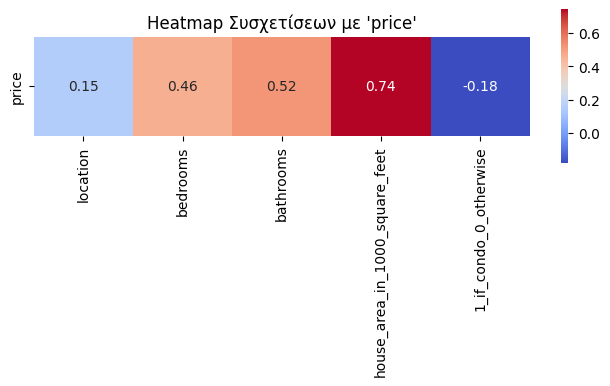

,price
location,0.153296
bedrooms,0.458129
bathrooms,0.521376
house_area_in_1000_square_feet,0.741807
1_if_condo_0_otherwise,-0.181357


In [22]:
df_numeric = get_numeric_dataframe(df, exclude=None)
analyze_correlations(df_numeric, target = "price")

## Επιλογή Μεταβλητών για το Απλό Γραμμικό Μοντέλο

Για την κατασκευή του πρώτου, απλού γραμμικού μοντέλου παλινδρόμησης, επιλέγονται δύο χαρακτηριστικά ως ανεξάρτητες μεταβλητές (`X_1`):

- `house_area_in_1000_square_feet`: επιφάνεια κατοικίας
- `bedrooms`: αριθμός υπνοδωματίων

Η εξαρτημένη μεταβλητή (target) είναι η `price`, δηλαδή η καθαρισμένη τιμή πώλησης σε χιλιάδες δολάρια.

Αυτή η επιλογή αντιστοιχεί στο μοντέλο της μορφής:

In [23]:
X_1 = df[["house_area_in_1000_square_feet", "bedrooms"]]
y_1 = df["price"]

## Ανάλυση Outliers

Πριν προχωρήσουμε στην εκπαίδευση του απλού γραμμικού μοντέλου, πραγματοποιείται έλεγχος για την ύπαρξη ακραίων τιμών (outliers) στις μεταβλητές `X_1`, δηλαδή:

- `house_area_in_1000_square_feet`
- `bedrooms`

Χρησιμοποιούνται οι εξής συναρτήσεις:

- `plot_all_numeric_boxplots()`: δημιουργεί boxplots για κάθε αριθμητική μεταβλητή, ώστε να εντοπιστούν γραφικά οι πιθανές ακραίες τιμές.
- `print_outliers_for_all_numeric()`: εμφανίζει αναλυτικά τις τιμές που εντοπίζονται ως outliers με βάση το IQR (interquartile range).

 Αν και υπάρχουν outliers, **δεν αφαιρούνται**, καθώς κρίνονται έγκυρα δεδομένα που αντικατοπτρίζουν πραγματικές τιμές στην αγορά ακινήτων (real estate).

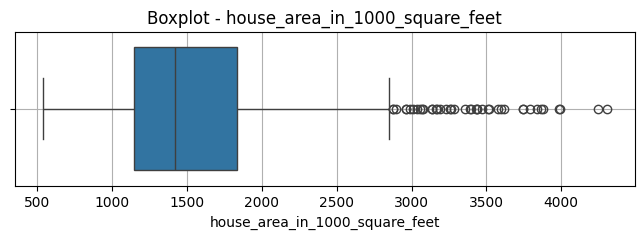


Στατιστικά για house_area_in_1000_square_feet

Q1 (25%): 1146.00

Q3 (75%): 1836.00

IQR: 690.00

Πιθανοί outliers κάτω από: 111.00

Πιθανοί outliers πάνω από: 2871.00


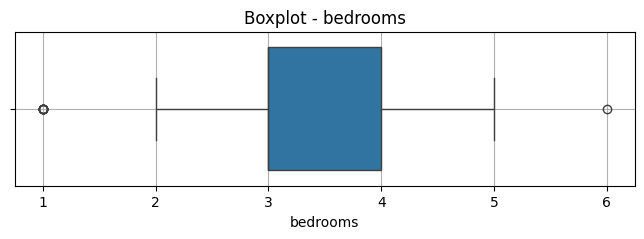


Στατιστικά για bedrooms

Q1 (25%): 3.00

Q3 (75%): 4.00

IQR: 1.00

Πιθανοί outliers κάτω από: 1.50

Πιθανοί outliers πάνω από: 5.50

Έλεγχος outliers στην στήλη:house_area_in_1000_square_feet

Βρέθηκαν 42 outliers:
     house_area_in_1000_square_feet  bedrooms
91                             3009         4
102                            3516         5
110                            3134         4
114                            3164         5
115                            3599         5
119                            3440         4
123                            3433         5
124                            3615         5
127                            3440         4
128                            3508         5
251                            3389         5
252                            3260         5
256                            3746         5
257                            3192         4
261                            3992         4
262                            3397         4
2

In [24]:
plot_all_numeric_boxplots(X_1, exclude=None)
print_outliers_for_all_numeric(X_1, exclude=None)

## Κατανομή και Στατιστικά Περιγραφής των Εισόδων

Προκειμένου να μελετηθεί η συμπεριφορά των εισόδων του απλού γραμμικού μοντέλου, δημιουργούνται διαγράμματα κατανομής (ιστογράμματα με καμπύλη KDE) και υπολογίζονται οι στατιστικοί δείκτες **ασυμμετρίας (skewness)** και **κυρτότητας (kurtosis)** για κάθε μεταβλητή.

### `house_area_in_1000_square_feet`
- **Skewness**: 1.46 (δεξιά ουρά – θετική ασυμμετρία - outliers προς τα υψηλά εμβαδά)
- **Kurtosis**: 2.38 (μέτρια κυρτότητα, ελαφρώς πιο “στρογγυλή” από την κανονική)

Η κατανομή είναι εμφανώς μη κανονική, με ουρά προς τα δεξιά. Περιέχει ακραίες τιμές που σχετίζονται με μεγάλα ακίνητα.

---

### `bedrooms`
- **Skewness**: 0.12 (σχεδόν συμμετρική)
- **Kurtosis**: 0.02 (πολύ κοντά στην κανονική κατανομή)

Η κατανομή εμφανίζει πολλαπλές κορυφές με κυρίαρχη τιμή τα 3 υπνοδωμάτια.

---
Σημείωση: Η μελέτη της κατανομής των εισόδων πραγματοποιήθηκε προκειμένου να εκτιμηθεί, ανάλογα με τη μορφή κάθε κατανομής, αν απαιτείται κανονικοποίηση των δεδομένων και ποιος μετασχηματισμός θα ήταν πιο κατάλληλος (π.χ. StandardScaler για κατανομές κοντά στην κανονική, ή MinMaxScaler για ασύμμετρες κατανομές). Ωστόσο, όπως αναφέρθηκε και σε προηγούμενο στάδιο της εργασίας, τελικά επιλέχθηκε να μη γίνει κανονικοποίηση για το συγκεκριμένο μοντέλο.

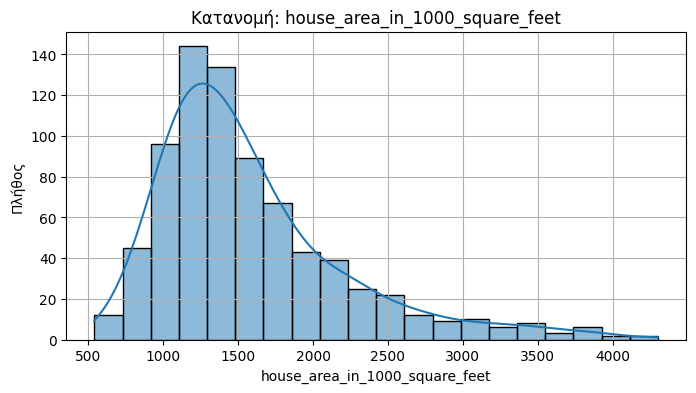

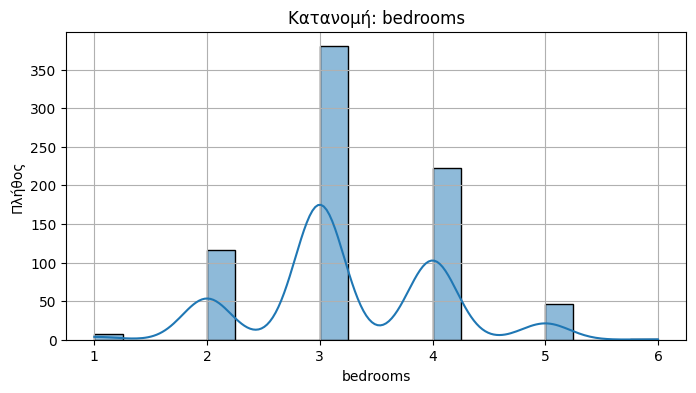


house_area_in_1000_square_feet
  Skewness (ασυμμετρία): 1.46
  Kurtosis (κυρτότητα): 2.38

bedrooms
  Skewness (ασυμμετρία): 0.12
  Kurtosis (κυρτότητα): 0.02


In [25]:
plot_distributions(X_1)
show_skew_kurtosis(X_1)

## Διάσπαση σε Training και Test Set

Σύμφωνα με την εκφώνηση, ζητείται να χρησιμοποιηθούν **695 δείγματα για εκπαίδευση** και τα υπόλοιπα **για δοκιμή**. Με βάση το συνολικό μέγεθος των δεδομένων (774 εγγραφές), αυτό αντιστοιχεί σε περίπου **90% training** και **10% test set**.

Η διάσπαση των δεδομένων πραγματοποιείται με τη χρήση της `train_test_split()` από τη βιβλιοθήκη `scikit-learn`, με `test_size=0.1` και `random_state=42` για σταθερά και επαναλήψιμα αποτελέσματα.

```python
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.1, random_state=42)

In [26]:
#X_1 = scale_features(X_1, method="minmax")

In [27]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.1, random_state=42)

In [28]:
print("Training set:", X_1_train.shape)
print("Test set:", X_1_test.shape)

Training set: (696, 2)
Test set: (78, 2)


In [29]:
model_1 = LinearRegression()
model_1.fit(X_1_train, y_1_train)

LinearRegression()

In [30]:
print("β1 (συντελεστής x1 - house area):", model_1.coef_[0])
print("β2 (συντελεστής x2 - bedrooms):", model_1.coef_[1])
print("c (σταθερά):", model_1.intercept_)

β1 (συντελεστής x1 - house area): 147.66109036569546
β2 (συντελεστής x2 - bedrooms): -16563.7101207593
c (σταθερά): 47655.18494549784


## Σύγκριση Πραγματικών και Προβλεπόμενων Τιμών (Όλα τα Δεδομένα)

Για την οπτική αξιολόγηση της απόδοσης του απλού γραμμικού μοντέλου, πραγματοποιείται πρόβλεψη των τιμών πώλησης για **όλες τις κατοικίες του dataset** (όχι μόνο για το test set). Στη συνέχεια, δημιουργείται διάγραμμα διασποράς (*scatter plot*) μεταξύ:

- **Οριζόντιος άξονας**: Πραγματική τιμή (`y`)
- **Κατακόρυφος άξονας**: Προβλεπόμενη τιμή (`ŷ`)

Η κόκκινη διακεκομμένη γραμμή αντιπροσωπεύει την ιδανική περίπτωση όπου οι προβλέψεις ταυτίζονται με τις πραγματικές τιμές (ŷ = y).

### Ερμηνεία:
- Όσο πιο κοντά βρίσκονται τα σημεία στη διαγώνια γραμμή, τόσο πιο ακριβής είναι η πρόβλεψη.
- Η διασπορά των σημείων γύρω από τη γραμμή αποκαλύπτει το σφάλμα πρόβλεψης.
- Πιθανά μοτίβα ή συστηματικές αποκλίσεις μπορεί να υποδεικνύουν αδυναμίες του μοντέλου (π.χ. υποτίμηση μεγάλων τιμών).

Αυτό το plot παρέχει μια **γενική εικόνα της ποιότητας πρόβλεψης** σε ολόκληρο το dataset.

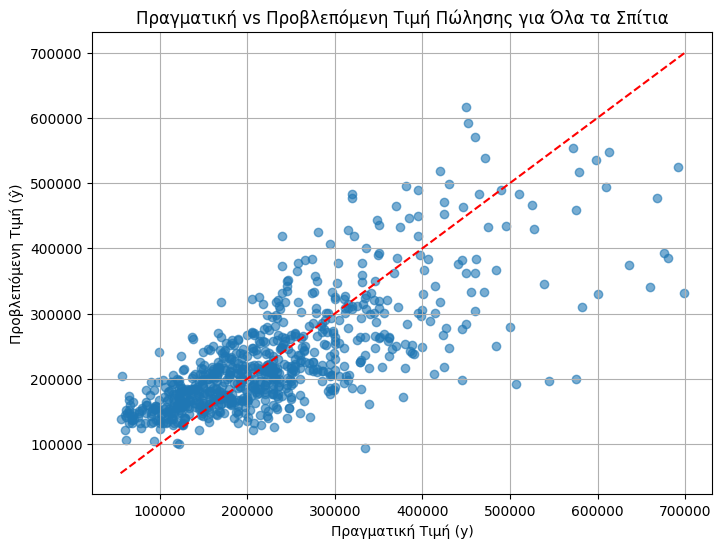

In [31]:
# 1. Χρήση του μοντέλου πάνω σε όλα τα δεδομένα X (όχι μόνο X_test)
y_pred_all_1 = model_1.predict(X_1)

# 2. Σχεδίαση scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_1, y_pred_all_1, alpha=0.6)
plt.xlabel("Πραγματική Τιμή (y)")
plt.ylabel("Προβλεπόμενη Τιμή (ŷ)")
plt.title("Πραγματική vs Προβλεπόμενη Τιμή Πώλησης για Όλα τα Σπίτια")
plt.grid(True)
plt.plot([y_1.min(), y_1.max()], [y_1.min(), y_1.max()], 'r--')  # Διαγώνια γραμμή σύγκρισης
plt.show()

In [32]:
# Χαρακτηριστικά και πραγματικές τιμές
test_houses = pd.DataFrame({
    'house_area_in_1000_square_feet': [846, 1324, 1150, 3037, 3984],
    'bedrooms': [1, 2, 3, 4, 5],
    'actual_price': [115000, 234500, 198000, 528000, 572500]
})

In [33]:
# Επιλογή X (μόνο τα χαρακτηριστικά)
X_custom = test_houses[['house_area_in_1000_square_feet', 'bedrooms']]
#X_custom = scale_features(X_custom, method="minmax")
# Πρόβλεψη
test_houses['predicted_price'] = model_1.predict(X_custom)

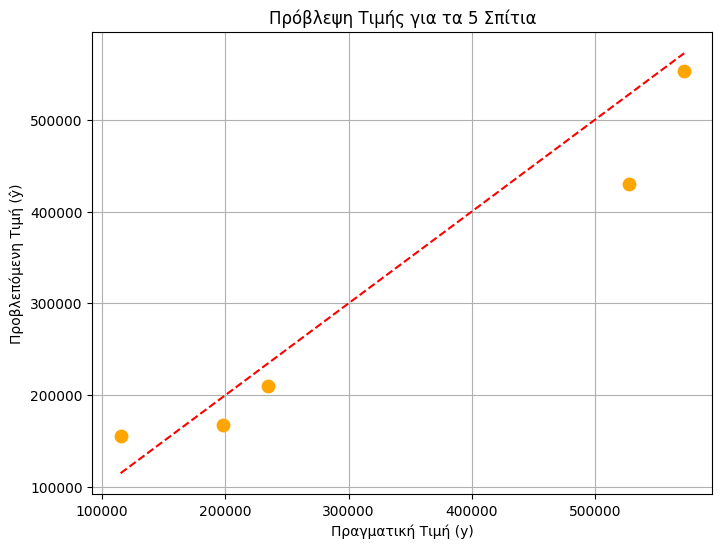

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(test_houses["actual_price"], test_houses["predicted_price"], color='orange', s=80)
plt.plot(
    [test_houses["actual_price"].min(), test_houses["actual_price"].max()],
    [test_houses["actual_price"].min(), test_houses["actual_price"].max()],
    'r--'
)
plt.xlabel("Πραγματική Τιμή (y)")
plt.ylabel("Προβλεπόμενη Τιμή (ŷ)")
plt.title("Πρόβλεψη Τιμής για τα 5 Σπίτια")
plt.grid(True)
plt.show()

In [35]:
# Υπολογισμός μετρικών σφάλματος
rmse_custom = root_mean_squared_error(test_houses["actual_price"], test_houses["predicted_price"])
mae_custom = mean_absolute_error(test_houses["actual_price"], test_houses["predicted_price"])

print(f"RMSE στα 5 σπίτια: {rmse_custom:.2f}")
print(f"MAE στα 5 σπίτια: {mae_custom:.2f}\n")

# Εκτύπωση τιμών
print("Πραγματική vs Προβλεπόμενη Τιμή:")
for i in range(len(test_houses)):
    actual = test_houses.loc[i, "actual_price"]
    predicted = test_houses.loc[i, "predicted_price"]
    print(f"Σπίτι {i+1}: Πραγματική = {actual:,.0f} | Προβλεπόμενη = {predicted:,.0f}")

RMSE στα 5 σπίτια: 51388.74
MAE στα 5 σπίτια: 42648.38

Πραγματική vs Προβλεπόμενη Τιμή:
Σπίτι 1: Πραγματική = 115,000 | Προβλεπόμενη = 156,013
Σπίτι 2: Πραγματική = 234,500 | Προβλεπόμενη = 210,031
Σπίτι 3: Πραγματική = 198,000 | Προβλεπόμενη = 167,774
Σπίτι 4: Πραγματική = 528,000 | Προβλεπόμενη = 429,847
Σπίτι 5: Πραγματική = 572,500 | Προβλεπόμενη = 553,118


In [36]:
# Προβλέψεις για τα σύνολα train και test
y_train_pred_1 = model_1.predict(X_1_train)
y_test_pred_1 = model_1.predict(X_1_test)

In [37]:
# Root mean square error
rmse_train_1 = root_mean_squared_error(y_1_train, y_train_pred_1)
rmse_test_1 = root_mean_squared_error(y_1_test, y_test_pred_1)

# Mean absolute error
mae_train_1 = mean_absolute_error(y_1_train, y_train_pred_1)
mae_test_1 = mean_absolute_error(y_1_test, y_test_pred_1)

# R2
r2_train_2 = r2_score(y_1_train, y_train_pred_1)
r2_test_2 = r2_score(y_1_test, y_test_pred_1)

print(f" RMSE (Train): {rmse_train_1:.2f} ")
print(f" RMSE (Test): {rmse_test_1:.2f} ")
print("\n--------------------")
print(f" MAE (Train): {mae_train_1:.2f} ")
print(f" MAE (Test): {mae_test_1:.2f} ")
print("\n--------------------")
print(f" R2 (Train): {r2_train_2:.2f} ")
print(f" R2 (Test): {r2_test_2:.2f} ")

 RMSE (Train): 74595.74 
 RMSE (Test): 77246.06 

--------------------
 MAE (Train): 55306.37 
 MAE (Test): 56867.16 

--------------------
 R2 (Train): 0.57 
 R2 (Test): 0.37 


### Ορισμός Basis Functions για Σύνθετο Μοντέλο

Στο πλαίσιο του Βήματος 5, δημιουργούνται 8 συνολικά χαρακτηριστικά (basis functions) για τη μοντελοποίηση της τιμής πώλησης:

- **f1**: Σταθερή μονάδα (intercept term)
- **f2**: Επιφάνεια κατοικίας σε ft² (x₁)
- **f3**: Καμπή στην επιφάνεια κατοικίας: `max(x₁ - 1500, 0)` (hinge function)
- **f4**: Αριθμός υπνοδωματίων (x₂)
- **f5**: Δυαδική μεταβλητή: 1 αν είναι condo, αλλιώς 0 (x₃)
- **f6 - f8**: One-hot encoding της μεταβλητής `location` για τις περιοχές 2, 3 και 4

Η τελική μήτρα χαρακτηριστικών `X_2` αποτελείται από αυτές τις βάσεις, οι οποίες θα χρησιμοποιηθούν σε ένα νέο γραμμικό μοντέλο.

### One-Hot Encoding της Μεταβλητής `location`

Για τη μεταβλητή `location`, εφαρμόζεται τεχνική one-hot encoding ώστε να μετατραπεί σε δυαδικές μεταβλητές (dummy variables). Χρησιμοποιείται η εντολή:

```python
location_dummies = pd.get_dummies(df["location"], prefix="loc", drop_first=True)
```
Το όρισμα drop_first=True οδηγεί στην παράλειψη της πρώτης κατηγορίας (π.χ. loc_1) ώστε να αποφευχθεί το πρόβλημα της `συσχέτιση πληροφορίας` στη γραμμική παλινδρόμηση.

Η πληροφορία για την πρώτη κατηγορία ανακτάται έμμεσα μέσω του συνδυασμού των υπολοίπων (π.χ. αν όλες οι υπόλοιπες είναι 0, τότε ανήκει στην πρώτη). Έτσι διατηρείται η πληρότητα της πληροφορίας χωρίς να εισάγεται συσχέτιση μεταξύ των features. 


In [38]:
location_dummies = pd.get_dummies(df["location"], prefix="loc", drop_first=True)

In [39]:
df["f1"] = 1  # σταθερή
df["f2"] = df["house_area_in_1000_square_feet"]  # x1: house area
df["f3"] = df["house_area_in_1000_square_feet"].apply(lambda x: max(x - 1500, 0))
df["f4"] = df["bedrooms"]  # x2
df["f5"] = df["1_if_condo_0_otherwise"]     # x3

In [40]:
features_to_scale = df[["f2", "f3", "f4"]]
#features_to_scale = scale_features(features_to_scale, method="minmax")
X_2 = pd.concat([df[["f1"]], features_to_scale, df[["f5"]], location_dummies], axis=1)
y_2 = df["price"]

In [41]:
print(X_2.columns.tolist())

['f1', 'f2', 'f3', 'f4', 'f5', 'loc_2', 'loc_3', 'loc_4']


### Συσχετίσεις των Basis Functions με τη Μεταβλητή-Στόχο

Υπολογίστηκε ο πίνακας συσχετίσεων Pearson μεταξύ όλων των basis functions (f1–f5 και one-hot περιοχών) και της μεταβλητής-στόχου `price`. Τα αποτελέσματα συνοψίζονται ως εξής:

- **f2 (house area)**: Ισχυρή θετική συσχέτιση με την τιμή (`0.74`)
- **f3 (max(area−1500, 0))**: Σχεδόν εξίσου ισχυρή (`0.69`), υποστηρίζοντας τη χρήση καμπής στα 1500 ft²
- **f4 (bedrooms)**: Μέτρια συσχέτιση (`0.46`)
- **f5 (condo ή όχι)**: Αρνητική συσχέτιση (`−0.18`)
- **loc_4**: Η μόνη περιοχή με σαφή θετική συσχέτιση με την τιμή (`0.31`)
- **loc_2 και loc_3**: Ασθενής αρνητική συσχέτιση με την τιμή

Η σταθερή βάση **f1** δεν εμφανίζει συσχέτιση (NaN), όπως αναμενόταν, αφού έχει σταθερή τιμή για όλα τα δείγματα και δεν περιέχει καμία πληροφορία διαφοροποίησης.

Αυτά τα αποτελέσματα επιβεβαιώνουν ότι:
- Η επιφάνεια κατοικίας και η θέση (location) είναι οι πιο κρίσιμοι παράγοντες
- Ο αριθμός υπνοδωματίων συμβάλλει μετρίως
- Ο τύπος κατοικίας (condo ή όχι) έχει μικρή αλλά υπαρκτή επίδραση

Το επόμενο βήμα είναι η εκπαίδευση του νέου μοντέλου με αυτά τα χαρακτηριστικά.


Πίνακας συσχετίσεων με τη μεταβλητή-στόχο 'price' (pearson)
f1            NaN
f2       0.741807
f3       0.687699
f4       0.458129
f5      -0.181357
loc_2   -0.126507
loc_3   -0.095089
loc_4    0.307436
Name: price, dtype: float64


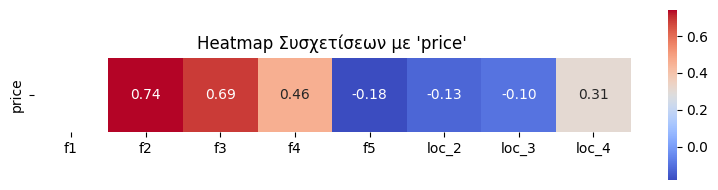

,price
f1,NaN
f2,0.741807
f3,0.687699
f4,0.458129
f5,-0.181357
loc_2,-0.126507
loc_3,-0.095089
loc_4,0.307436


In [42]:
X_2_corr = pd.concat([df[["f1", "f2", "f3", "f4", "f5"]], location_dummies,df["price"]], axis=1)
analyze_correlations(X_2_corr, target = "price")

In [43]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.1, random_state=42)

In [44]:
model_2 = LinearRegression()
model_2.fit(X_2_train, y_2_train)

LinearRegression()

In [45]:
print("Συντελεστές μοντέλου (β1 έως β8):\n")

coef_labels = [
    "β1 (f1 - σταθερά βάσης)", 
    "β2 (f2 - house area)", 
    "β3 (f3 - max(area - 1500, 0))", 
    "β4 (f4 - bedrooms)", 
    "β5 (f5 - is_condo)", 
    "β6 (f6 - location=2)", 
    "β7 (f7 - location=3)", 
    "β8 (f8 - location=4)"
]

for i, coef in enumerate(model_2.coef_):
    print(f"{coef_labels[i]}: {coef:.2f}")

print(f"\nc (σταθερός όρος): {model_2.intercept_:.2f}")

Συντελεστές μοντέλου (β1 έως β8):

β1 (f1 - σταθερά βάσης): 0.00
β2 (f2 - house area): 165.85
β3 (f3 - max(area - 1500, 0)): -31.57
β4 (f4 - bedrooms): -14348.66
β5 (f5 - is_condo): -13324.03
β6 (f6 - location=2): -95932.99
β7 (f7 - location=3): -104544.32
β8 (f8 - location=4): -17507.02

c (σταθερός όρος): 110211.53


In [46]:
y_pred_2 = model_2.predict(X_2)

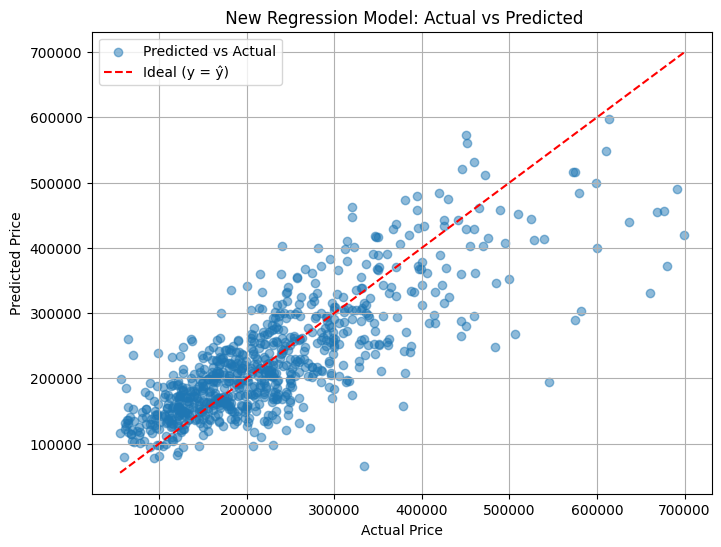

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(y_2, y_pred_2, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_2.min(), y_2.max()], [y_2.min(), y_2.max()], 'r--', label="Ideal (y = ŷ)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" New Regression Model: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

In [48]:
y_train_pred_2 = model_2.predict(X_2_train)
y_test_pred_2 = model_2.predict(X_2_test)

rmse_train_2 = root_mean_squared_error(y_2_train, y_train_pred_2)
rmse_test_2 = root_mean_squared_error(y_2_test, y_test_pred_2)

# Mean absolute error
mae_train_2 = mean_absolute_error(y_2_train, y_train_pred_2)
mae_test_2 = mean_absolute_error(y_2_test, y_test_pred_2)

# R2
r2_train_2 = r2_score(y_2_train, y_train_pred_2)
r2_test_2 = r2_score(y_2_test, y_test_pred_2)

print(f" RMSE (Train): {rmse_train_2:.2f} ")
print(f" RMSE (Test): {rmse_test_2:.2f} ")
print("\n--------------------")
print(f" MAE (Train): {mae_train_2:.2f} ")
print(f" MAE (Test): {mae_test_2:.2f} ")

print("\n--------------------")
print(f" R2 (Train): {r2_train_2:.2f} ")
print(f" R2 (Test): {r2_test_2:.2f} ")

 RMSE (Train): 68195.68 
 RMSE (Test): 70395.05 

--------------------
 MAE (Train): 50440.13 
 MAE (Test): 53474.69 

--------------------
 R2 (Train): 0.64 
 R2 (Test): 0.48 


### Αποτελέσματα Εκπαίδευσης Σύνθετου Μοντέλου

Το νέο μοντέλο, το οποίο βασίστηκε σε 8 basis functions, έδωσε τα εξής αποτελέσματα σφάλματος (Root Mean Squared Error):

- **RMSE (Train)**: 68,195.68
- **RMSE (Test)**: 70,395.05

Σε σύγκριση με το απλό γραμμικό μοντέλο, το σύνθετο μοντέλο:

- Παρουσιάζει **βελτιωμένο σφάλμα**, ειδικά στο test set.
- Φαίνεται να **γενικεύει καλύτερα** στα δεδομένα δοκιμής.

### Διασταυρούμενη Επικύρωση (Cross Validation)

Για να ελέγξουμε τη σταθερότητα και την ικανότητα γενίκευσης των δύο μοντέλων (απλού και σύνθετου), εφαρμόζουμε την τεχνική **K-Fold Cross Validation** με 5 επαναλήψεις (cv=5).

Η μέτρηση βασίζεται στο σφάλμα **RMSE**, το οποίο μετατρέπεται από το `neg_root_mean_squared_error` που χρησιμοποιεί το `cross_val_score`.

### Διασταυρούμενη Επικύρωση (Cross-Validation) των Μοντέλων

Για την αξιολόγηση της ικανότητας γενίκευσης των δύο μοντέλων, εφαρμόστηκε διασταυρούμενη επικύρωση 5-fold (5 επαναλήψεων). Η μέτρηση έγινε με τη χρήση της ρίζας του μέσου τετραγωνικού σφάλματος (RMSE), που τιμωρεί περισσότερο τις μεγάλες αποκλίσεις.

#### RMSE ανά fold:
 **Απλό μοντέλο** (μόνο `house_area`, `bedrooms`):
  - `[68,791, 80,155, 89,541, 54,481, 80,136]`
  - **Μέση RMSE**: `74,621`


 **Σύνθετο μοντέλο** (με επιπλέον χαρακτηριστικά):
  - `[64,946, 71,374, 83,721, 50,821, 72,371]`
  - **Μέση RMSE**: `68,646`

#### Συμπεράσματα:
- Το **σύνθετο μοντέλο εμφανίζει χαμηλότερη μέση τιμή σφάλματος RMSE** κατά περίπου **6,000 μονάδες**, γεγονός που δηλώνει **καλύτερη ικανότητα πρόβλεψης** σε άγνωστα δεδομένα.
- Η ενσωμάτωση μετασχηματισμένων χαρακτηριστικών (όπως `f3 = max(area - 1500, 0)`) και κατηγορικών μεταβλητών (`location`) βελτιώνει αισθητά την επίδοση του μοντέλου.


In [49]:
# Χρησιμοποιούμε scoring='neg_root_mean_squared_error' για να πάρουμε RMSE
rmse_scores_1, mean_rmse_1, mae_scores, mean_mae = cross_validated_rmse(model_1, X_1, y_1, return_mean=True)
for rmse in rmse_scores_1:
    print("\nRMSE ανά fold για το πρώτο μοντέλο:", rmse)
print("\n-----------------\nΜέση RMSE για το πρώτο μοντέλο:", mean_rmse_1)
print("\n-----------------")

for mae in mae_scores:
    print("\nMAE ανά fold για το πρώτο μοντέλο:", mae)
print("\n-----------------\nΜέση MAE για το πρώτο μοντέλο:", mean_mae)
print("\n-----------------")


RMSE ανά fold για το πρώτο μοντέλο: 68791.46277581221

RMSE ανά fold για το πρώτο μοντέλο: 80155.0308949149

RMSE ανά fold για το πρώτο μοντέλο: 89540.9580369877

RMSE ανά fold για το πρώτο μοντέλο: 54480.993960548

RMSE ανά fold για το πρώτο μοντέλο: 80136.46998313774

-----------------
Μέση RMSE για το πρώτο μοντέλο: 74620.98313028012

-----------------

MAE ανά fold για το πρώτο μοντέλο: 53887.34546784742

MAE ανά fold για το πρώτο μοντέλο: 57867.19233400668

MAE ανά fold για το πρώτο μοντέλο: 67713.19683117402

MAE ανά fold για το πρώτο μοντέλο: 45112.54047050683

MAE ανά fold για το πρώτο μοντέλο: 56653.5783043367

-----------------
Μέση MAE για το πρώτο μοντέλο: 56246.77068157434

-----------------


In [50]:
# Χρησιμοποιούμε scoring='neg_root_mean_squared_error' για να πάρουμε RMSE
rmse_scores_2, mean_rmse_2, mae_scores, mean_mae = cross_validated_rmse(model_2, X_2, y_2, return_mean=True)
for rmse in rmse_scores_2:
    print("\nRMSE ανά fold για το δεύτερο μοντέλο:", rmse)
print("\n-----------------\nΜέση RMSE για το δεύτερο μοντέλο:", mean_rmse_2)
print("\n-----------------")

for mae in mae_scores:
    print("\nMAE ανά fold για το δεύτερο μοντέλο:", mae)
print("\n-----------------\nΜέση MAE για το δεύτερο μοντέλο:", mean_mae)
print("\n-----------------")


RMSE ανά fold για το δεύτερο μοντέλο: 64945.77710016504

RMSE ανά fold για το δεύτερο μοντέλο: 71373.6061570295

RMSE ανά fold για το δεύτερο μοντέλο: 83720.69022112958

RMSE ανά fold για το δεύτερο μοντέλο: 50820.70334469194

RMSE ανά fold για το δεύτερο μοντέλο: 72371.37840122012

-----------------
Μέση RMSE για το δεύτερο μοντέλο: 68646.43104484724

-----------------

MAE ανά fold για το δεύτερο μοντέλο: 48885.91084154354

MAE ανά fold για το δεύτερο μοντέλο: 48034.4929923122

MAE ανά fold για το δεύτερο μοντέλο: 64347.977752989675

MAE ανά fold για το δεύτερο μοντέλο: 41712.160758264276

MAE ανά fold για το δεύτερο μοντέλο: 53719.36654082853

-----------------
Μέση MAE για το δεύτερο μοντέλο: 51339.98177718765

-----------------


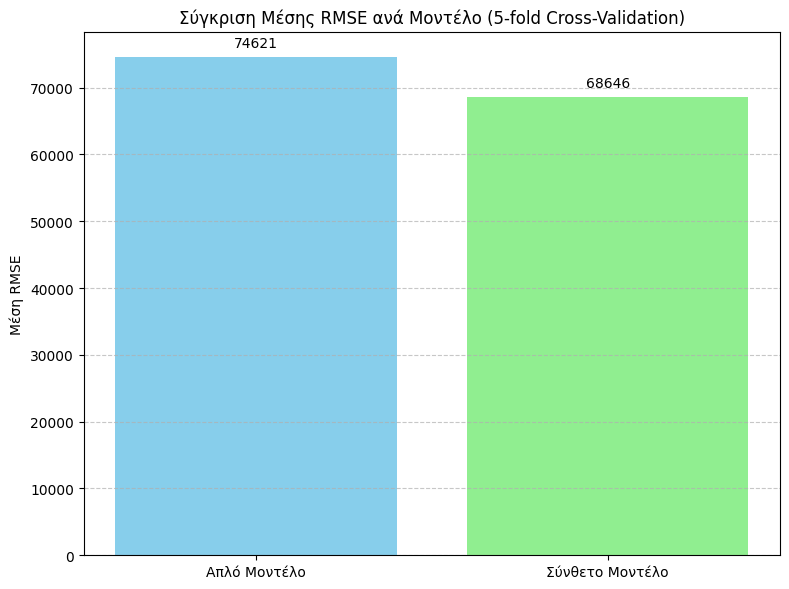

In [51]:
# RMSE τιμές ανά fold
rmse_model_1 = rmse_scores_1
rmse_model_2 = rmse_scores_2

# Υπολογισμός μέσου RMSE
#mean_rmse_1 = sum(rmse_model_1) / len(rmse_model_1)
#mean_rmse_2 = sum(rmse_model_2) / len(rmse_model_2)

# Ονόματα μοντέλων και μέσες τιμές
models = ['Απλό Μοντέλο', 'Σύνθετο Μοντέλο']
mean_rmses = [mean_rmse_1, mean_rmse_2]

# Barplot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, mean_rmses, color=['skyblue', 'lightgreen'])
plt.ylabel('Μέση RMSE')
plt.title('Σύγκριση Μέσης RMSE ανά Μοντέλο (5-fold Cross-Validation)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Εμφάνιση τιμών πάνω στις μπάρες
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000, f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Συγκριτική Απόδοση των Μοντέλων και Cross-Validation

Για την αξιολόγηση της απόδοσης των δύο γραμμικών μοντέλων, εφαρμόστηκε τόσο απευθείας σύγκριση δεικτών σφάλματος (RMSE και MAE), όσο και η τεχνική της **διασταυρούμενης επικύρωσης (cross-validation)** με 5 folds, ώστε να εκτιμηθεί η ικανότητα γενίκευσης.

### Απλό Μοντέλο (Model 1)
- Περιλαμβάνει μόνο τα χαρακτηριστικά `house area` και `bedrooms`
- Μέση RMSE από cross-validation: **74,621 €**
- Μέση MAE: **56,247 €**

### Σύνθετο Μοντέλο (Model 2)
- Ενσωματώνει επιπλέον **engineered χαρακτηριστικά** όπως η f3 (area > 1500 sq ft), καθώς και **one-hot encoded** μεταβλητές για την τοποθεσία
- Μέση RMSE: **68,646 €**
- Μέση MAE: **51,340 €**

Η **μείωση του σφάλματος** στο Model 2 είναι **συνεπής** τόσο στις επιδόσεις του στο training/test set όσο και στη μέση απόδοση μέσω cross-validation, γεγονός που υποδηλώνει **καλύτερη γενίκευση χωρίς overfitting**.

### Παρατηρήσεις

- Το **MAE** είναι αναμενόμενα μικρότερο από το **RMSE**, καθώς δεν τιμωρεί τα μεγάλα σφάλματα με τετραγωνισμό. Παρέχει έτσι μια πιο "ήπια" εκτίμηση του μέσου σφάλματος.
- Η συμπερίληψη **μη γραμμικών όρων** και **κατηγορικών χαρακτηριστικών** βελτίωσε σημαντικά την απόδοση του μοντέλου, επιβεβαιώνοντας τη σημασία του feature engineering.

| Μοντέλο       | RMSE (Train) | RMSE (Test) | MAE (Train) | MAE (Test) | Cross-Validation RMSE | Cross-Validation MAE | RMSE (5 σπίτια) | MAE (σπίτια) |
|---------------|--------------|-------------|-------------|------------|-----------------------|----------------------|------------------|-----------|
| Model 1 (No Scaling) | 74,595.74    | 77,246.06   | 55,306.37   | 56,867.16  | 74,620.98      | 56,246.77            | 51,388.74        | 42,648.38       |
| Model 1 (MinMax)     | 74,595.74    | 77,246.06   | 55,306.37   | 56,867.16  | 74,620.98      | 56,246.77            | 59,468.12        | 48,318.27       |
| Model 2 (No Scaling) | 68,195.68    | 70,395.05   | 50,440.13   | 53,474.69  | 68,646.43      | 51,339.98            | –                | –               |
| Model 2 (MinMax)     | 68,195.68    | 70,395.05   | 50,440.13   | 53,474.69  | 68,646.43      | 51,339.98            | –                | –               |

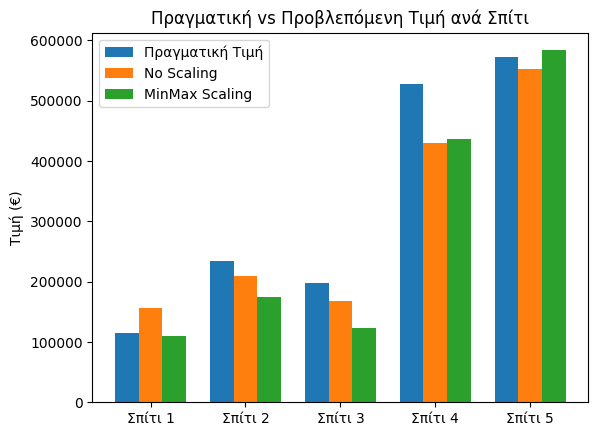

In [52]:

houses = ['Σπίτι 1', 'Σπίτι 2', 'Σπίτι 3', 'Σπίτι 4', 'Σπίτι 5']
true = [115000, 234500, 198000, 528000, 572500]
pred_no = [156013, 210031, 167774, 429847, 553118]
pred_minmax = [110681, 174639, 123115, 436632, 583659]

x = range(len(houses))

plt.bar([i - 0.25 for i in x], true, width=0.25, label='Πραγματική Τιμή')
plt.bar(x, pred_no, width=0.25, label='No Scaling')
plt.bar([i + 0.25 for i in x], pred_minmax, width=0.25, label='MinMax Scaling')

plt.xticks(x, houses)
plt.ylabel('Τιμή (€)')
plt.title('Πραγματική vs Προβλεπόμενη Τιμή ανά Σπίτι')
plt.legend()
plt.show()

| Σπίτι | Πραγματική Τιμή | Προβλεπόμενη (No Scaling) | Προβλεπόμενη (MinMax Scaling) |
|-------|------------------|----------------------------|--------------------------------|
| 1     | 115,000          | 156,013                    | 110,681                        |
| 2     | 234,500          | 210,031                    | 174,639                        |
| 3     | 198,000          | 167,774                    | 123,115                        |
| 4     | 528,000          | 429,847                    | 436,632                        |
| 5     | 572,500          | 553,118                    | 583,659                        |

### Σύγκριση Προβλέψεων: No Scaling vs MinMax Scaling

- **MinMax Scaling** είχε πιο ακριβείς προβλέψεις στα σπίτια **1** και **4**.
- **No Scaling** απέδωσε καλύτερα στα σπίτια **2**, **3** και **5**.

Παρότι το MinMax ήταν ακριβέστερο σε ορισμένες περιπτώσεις, τα σφάλματα του ήταν **πολύ μεγαλύτερα όταν απέτυχε** (π.χ. στο Σπίτι 3, το σφάλμα ήταν ~75.000€, ενώ χωρίς scaling ήταν ~30.000€).

Δεδομένου ότι το **RMSE τιμωρεί τα μεγάλα λάθη** (με τετραγωνισμό), ακόμη και λίγα μεγάλα σφάλματα μπορούν να αυξήσουν σημαντικά τον συνολικό δείκτη.

#### Συμπέρασμα:

Το μοντέλο **χωρίς κανονικοποίηση** είχε:
- **Χαμηλότερα συνολικά σφάλματα** (RMSE και MAE)
- **Πιο σταθερές και ισορροπημένες αποκλίσεις**

## Έλεγχος Overfitting / Underfitting

Για την εκτίμηση της ικανότητας γενίκευσης των δύο μοντέλων, συγκρίθηκαν οι τιμές των δεικτών RMSE, MAE και R² μεταξύ του training και του test set.

### Model 1 (Απλό γραμμικό μοντέλο)

| Μετρική | Training | Test     | Διαφορά |
|---------|----------|----------|---------|
| RMSE    | 74,595   | 77,246   | +2,651  |
| MAE     | 55,306   | 56,867   | +1,561  |
| R²      | 0.57     | 0.37     | −0.20   |

Το Model 1 παρουσιάζει **μέτρια απόδοση** στο training set και σημαντική πτώση στο test. Η διαφορά 0.20 στο R² δείχνει **χαμηλή ικανότητα γενίκευσης**.

---

### Model 2 (Σύνθετο γραμμικό μοντέλο)

| Μετρική | Training | Test    | Διαφορά |
|---------|----------|---------|---------|
| RMSE    | 68,196   | 70,395  | +2,199  |
| MAE     | 50,440   | 53,475  | +3,035  |
| R²      | 0.64     | 0.48    | −0.16   |

Το Model 2 επιτυγχάνει **χαμηλότερο σφάλμα** και **καλύτερο R²** τόσο στο training όσο και στο test.

---

### Συμπέρασμα

- Το **Model 2** παρουσιάζει **ισορροπημένη απόδοση** και υπερτερεί συνολικά σε όλους τους δείκτες.
- Το **Model 1** φαίνεται να υπομοντελοποιεί (underfitting), καθώς ούτε στο training αποδίδει ικανοποιητικά